# Point·E presentation 
(based on https://github.com/openai/point-e)

In [ ]:
! git clone https://github.com/openai/point-e.git

fatal: destination path 'point-e' already exists and is not an empty directory.


In [ ]:
! pip install -q -e point-e

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
from PIL import Image
import torch
from tqdm.auto import tqdm

import os, sys
point_e_source =  os.path.join(os.getcwd(), 'point-e')
if point_e_source not in sys.path:
    sys.path.append(point_e_source)

from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.plotting import plot_point_cloud

import random

def seed(seed):
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

## text2pointcloud

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating base model...')
base_name = 'base40M-textvec'
base_model = model_from_config(MODEL_CONFIGS[base_name], device)
base_model.eval()
base_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[base_name])

print('creating upsample model...')
upsampler_model = model_from_config(MODEL_CONFIGS['upsample'], device)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS['upsample'])

print('downloading base checkpoint...')
base_model.load_state_dict(load_checkpoint(base_name, device))

print('downloading upsampler checkpoint...')
upsampler_model.load_state_dict(load_checkpoint('upsample', device))

creating base model...
creating upsample model...
downloading base checkpoint...
downloading upsampler checkpoint...


<All keys matched successfully>

In [ ]:
sampler = PointCloudSampler(
    device=device,
    models=[base_model, upsampler_model],
    diffusions=[base_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 0.0],
    model_kwargs_key_filter=('texts', ''), # Do not condition the upsampler at all
)

0it [00:00, ?it/s]

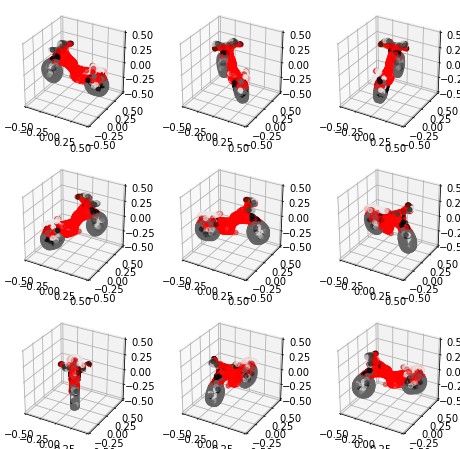

In [ ]:
seed(42)

# Set a prompt to condition on.
prompt = 'a red motorcycle'

# Produce a sample from the model.
samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(texts=[prompt]))):
    samples = x

pc = sampler.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.5, -0.5, -0.5), (0.5, 0.5, 0.5)))

In [ ]:
seed(42)

prompts = ['a green dress', 'a blue guitar', 'a brown bear', 'a striped black and yellow pillow']

samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=4, model_kwargs=dict(texts=prompts))):
    samples = x

pc = sampler.output_to_point_clouds(samples)

0it [00:00, ?it/s]

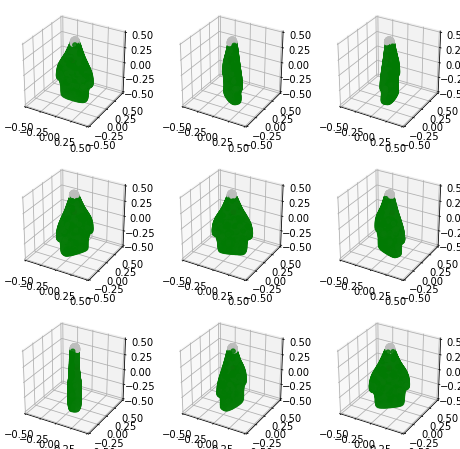

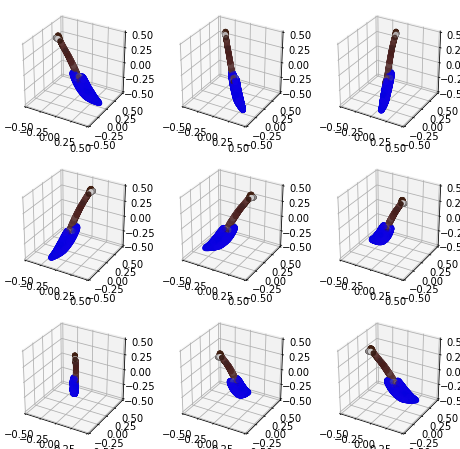

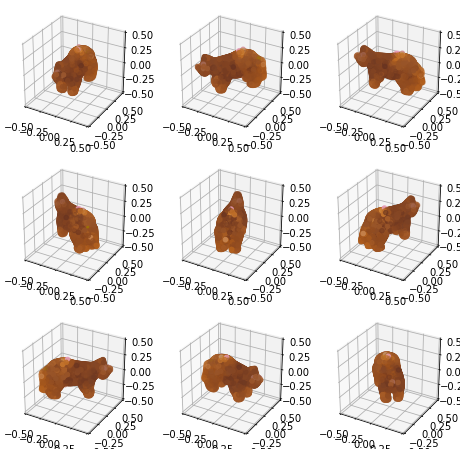

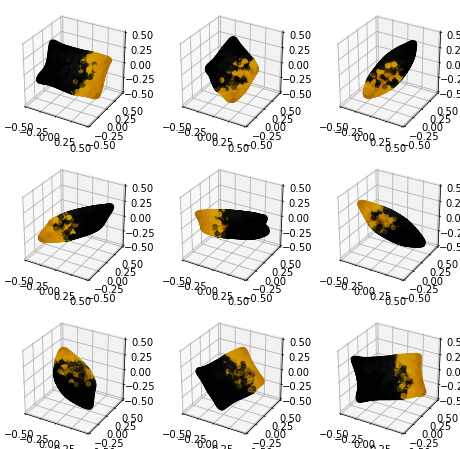

In [ ]:
for i in range(len(prompts)):
    plot_point_cloud(pc[i], grid_size=3, fixed_bounds=((-0.5, -0.5, -0.5), (0.5, 0.5, 0.5)))

In [ ]:
seed(42)

prompt = 'a man next to a corgi'

samples = None
for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(texts=[prompt]))):
    samples = x

pc = sampler.output_to_point_clouds(samples)

0it [00:00, ?it/s]

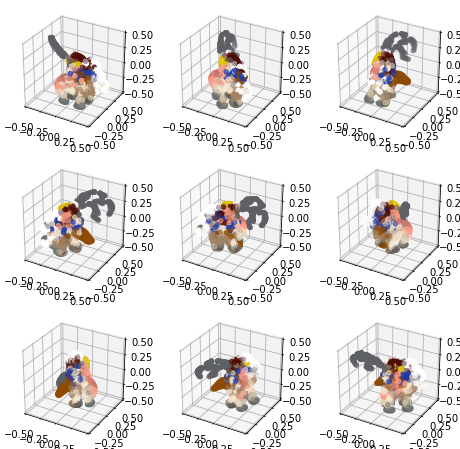

In [ ]:
fig = plot_point_cloud(pc[0], grid_size=3, fixed_bounds=((-0.5, -0.5, -0.5), (0.5, 0.5, 0.5)))

## image2pointcloud

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating base model...')
base2_name = 'base40M'
base2_model = model_from_config(MODEL_CONFIGS[base2_name], device)
base2_model.eval()
base2_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[base2_name])

print('creating upsample model...')
upsampler_model = model_from_config(MODEL_CONFIGS['upsample'], device)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS['upsample'])

print('downloading base checkpoint...')
base2_model.load_state_dict(load_checkpoint(base2_name, device))

print('downloading upsampler checkpoint...')
upsampler_model.load_state_dict(load_checkpoint('upsample', device))

sampler2 = PointCloudSampler(
    device=device,
    models=[base2_model, upsampler_model],
    diffusions=[base2_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 3.0],
)

creating base model...
creating upsample model...
downloading base checkpoint...
downloading upsampler checkpoint...


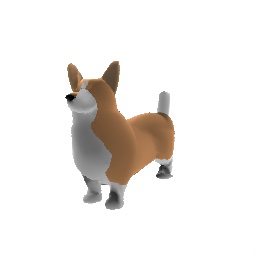

In [ ]:
img = Image.open('point-e/point_e/examples/example_data/corgi.jpg')
img

0it [00:00, ?it/s]

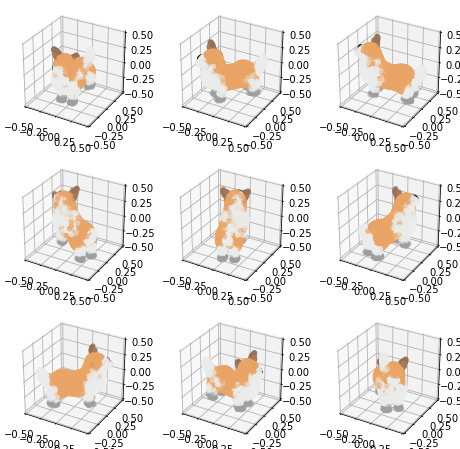

In [ ]:
seed(42)

samples = None
for x in tqdm(sampler2.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

pc = sampler2.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.5, -0.5, -0.5), (0.5, 0.5, 0.5)))

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating base model...')
base3_name = 'base300M'
base3_model = model_from_config(MODEL_CONFIGS[base3_name], device)
base3_model.eval()
base3_diffusion = diffusion_from_config(DIFFUSION_CONFIGS[base3_name])

print('creating upsample model...')
upsampler_model = model_from_config(MODEL_CONFIGS['upsample'], device)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS['upsample'])

print('downloading base checkpoint...')
base3_model.load_state_dict(load_checkpoint(base3_name, device))

print('downloading upsampler checkpoint...')
upsampler_model.load_state_dict(load_checkpoint('upsample', device))

sampler3 = PointCloudSampler(
    device=device,
    models=[base3_model, upsampler_model],
    diffusions=[base3_diffusion, upsampler_diffusion],
    num_points=[1024, 4096 - 1024],
    aux_channels=['R', 'G', 'B'],
    guidance_scale=[3.0, 3.0],
)

creating base model...
creating upsample model...
downloading base checkpoint...


  0%|          | 0.00/1.25G [00:00<?, ?iB/s]

downloading upsampler checkpoint...


0it [00:00, ?it/s]

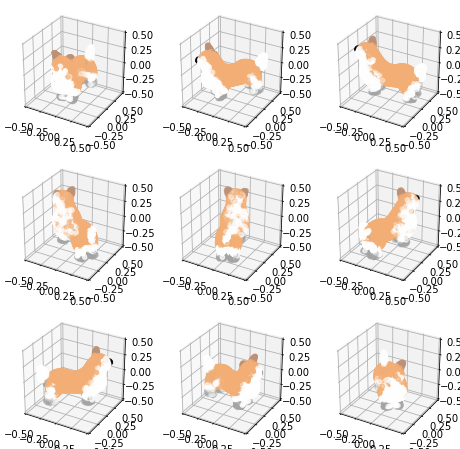

In [ ]:
seed(42)

samples = None
for x in tqdm(sampler3.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img]))):
    samples = x

pc = sampler3.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3, fixed_bounds=((-0.5, -0.5, -0.5), (0.5, 0.5, 0.5)))

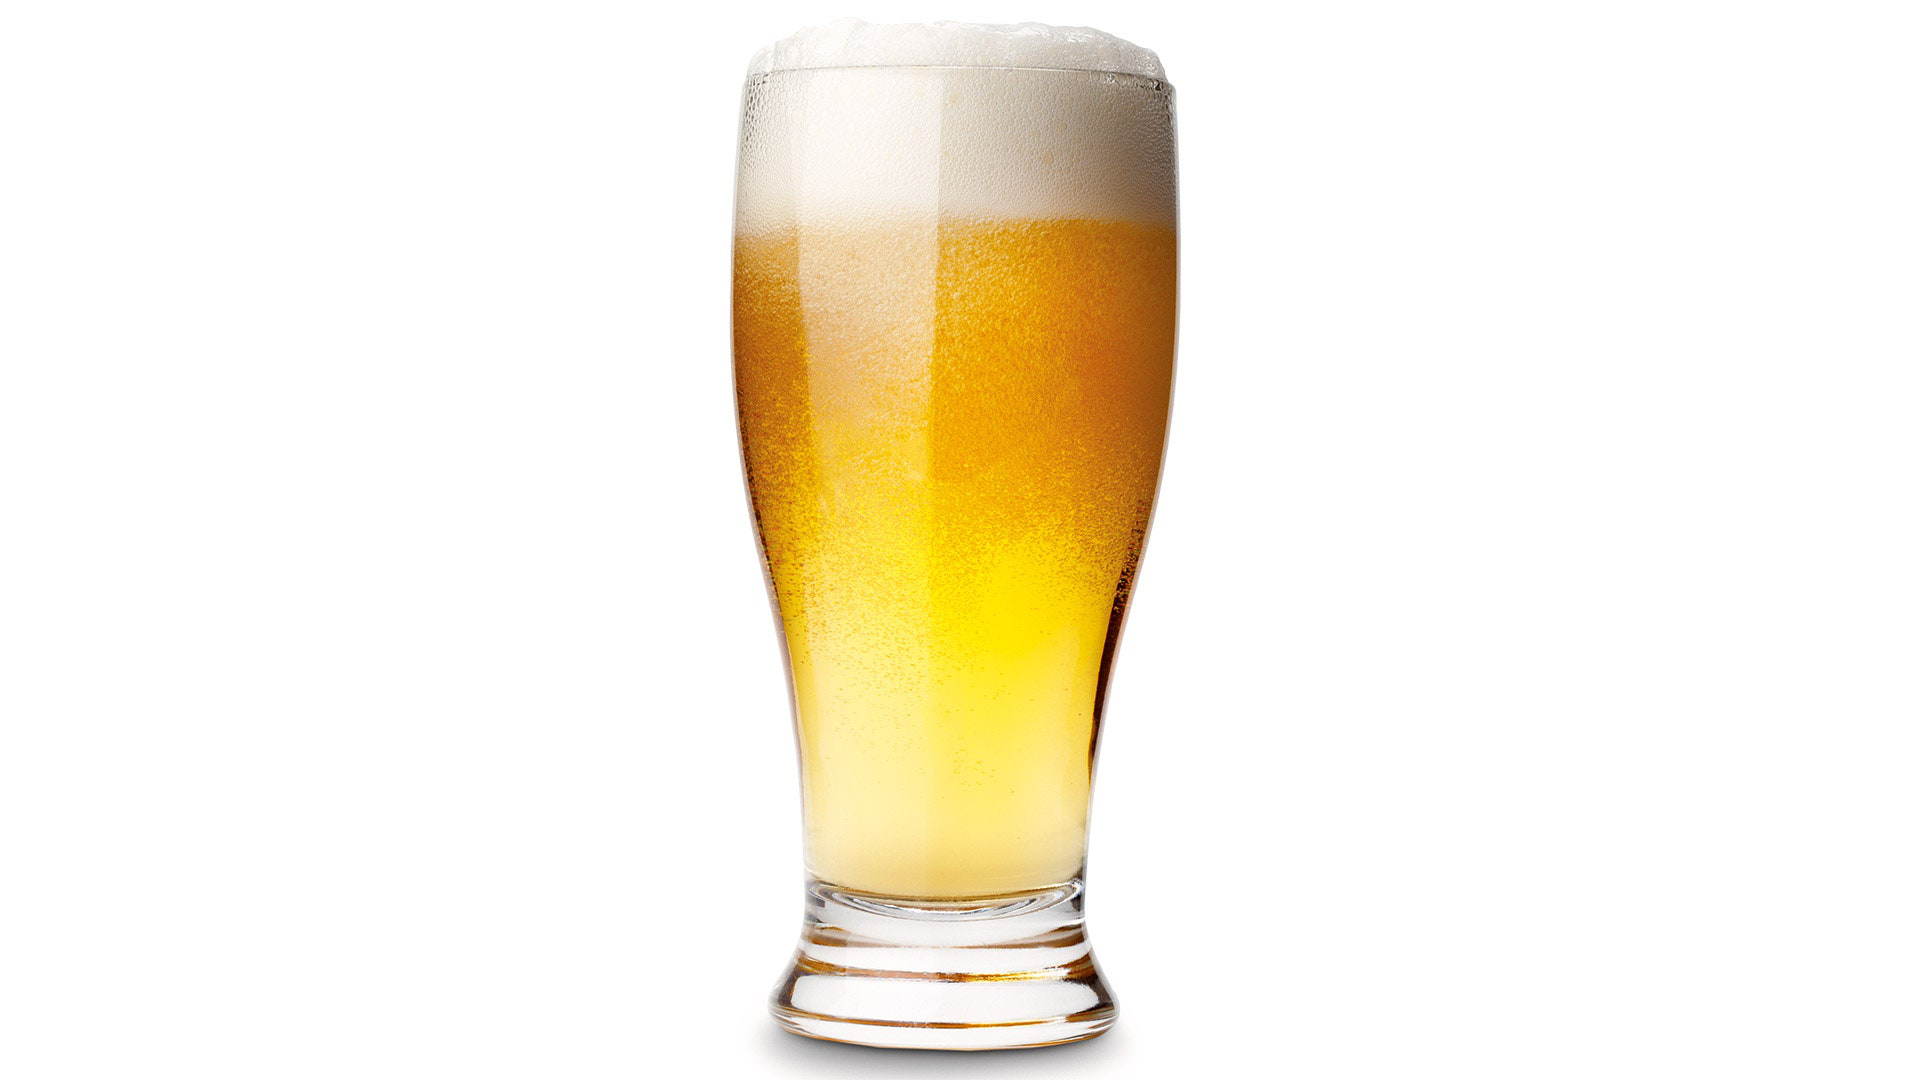

In [ ]:
!wget -q https://assets.gqindia.com/photos/5cdc6ee38e629927bbf38027/16:9/w_2560%2Cc_limit/gq_2014_boutique_beers_0.jpg
img2 = Image.open('gq_2014_boutique_beers_0.jpg')
img2

0it [00:00, ?it/s]

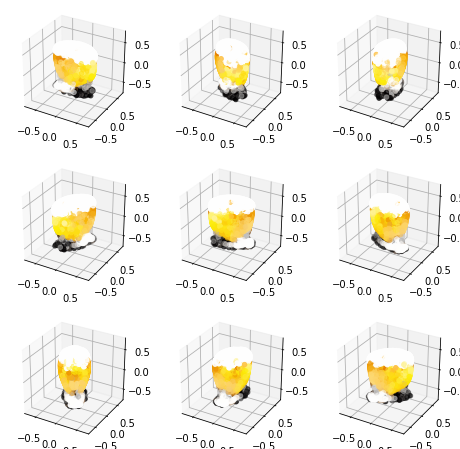

In [ ]:
seed(42)

samples = None
for x in tqdm(sampler2.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img2]))):
    samples = x

pc = sampler2.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3)

0it [00:00, ?it/s]

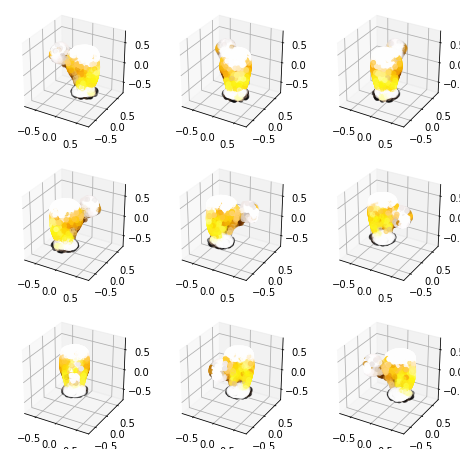

In [ ]:
seed(42)

samples = None
for x in tqdm(sampler3.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img2]))):
    samples = x

pc = sampler3.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3)

0it [00:00, ?it/s]

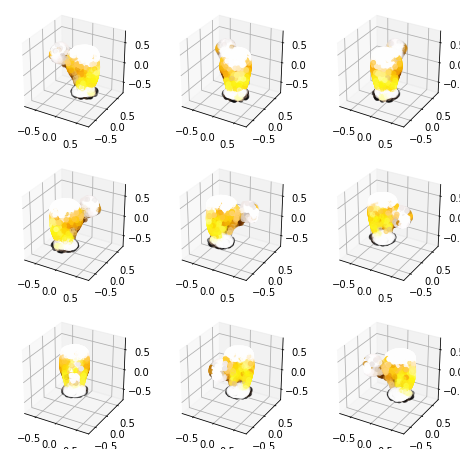

In [ ]:
seed(42)

prompt = 'a cylindric glass of light foaming beer'

samples = None
for x in tqdm(sampler3.sample_batch_progressive(batch_size=1, model_kwargs=dict(images=[img2], texts=[prompt]))):
    samples = x

pc = sampler3.output_to_point_clouds(samples)[0]
fig = plot_point_cloud(pc, grid_size=3)